In [1]:
import numpy as np
import pandas as pd
import datetime

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

plt.style.use('seaborn-darkgrid')
plt.rc('figure', figsize=(16,10))
plt.rc('lines', markersize=4)

import yfinance as yf

from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error


In [2]:
df = pd.read_csv('data/close_price_big_5.csv', index_col=['Date'], infer_datetime_format=True, parse_dates=['Date'])
df.head()

,AAPL,GOOGL,MSFT,AMZN,FB
Date,,,,,
2018-12-31,157.740005,1044.959961,101.570000,1501.969971,131.089996
2019-01-02,157.919998,1054.680054,101.120003,1539.130005,135.679993
2019-01-03,142.190002,1025.469971,97.400002,1500.280029,131.740005
2019-01-04,148.259995,1078.069946,101.930000,1575.390015,137.949997
2019-01-07,147.929993,1075.920044,102.059998,1629.510010,138.050003


In [3]:
date_x = df.index[1:].to_numpy()
print(date_x.shape)
print(date_x)

(334,)
['2019-01-02T00:00:00.000000000' '2019-01-03T00:00:00.000000000'
 '2019-01-04T00:00:00.000000000' '2019-01-07T00:00:00.000000000'
 '2019-01-08T00:00:00.000000000' '2019-01-09T00:00:00.000000000'
 '2019-01-10T00:00:00.000000000' '2019-01-11T00:00:00.000000000'
 '2019-01-14T00:00:00.000000000' '2019-01-15T00:00:00.000000000'
 '2019-01-16T00:00:00.000000000' '2019-01-17T00:00:00.000000000'
 '2019-01-18T00:00:00.000000000' '2019-01-22T00:00:00.000000000'
 '2019-01-23T00:00:00.000000000' '2019-01-24T00:00:00.000000000'
 '2019-01-25T00:00:00.000000000' '2019-01-28T00:00:00.000000000'
 '2019-01-29T00:00:00.000000000' '2019-01-30T00:00:00.000000000'
 '2019-01-31T00:00:00.000000000' '2019-02-01T00:00:00.000000000'
 '2019-02-04T00:00:00.000000000' '2019-02-05T00:00:00.000000000'
 '2019-02-06T00:00:00.000000000' '2019-02-07T00:00:00.000000000'
 '2019-02-08T00:00:00.000000000' '2019-02-11T00:00:00.000000000'
 '2019-02-12T00:00:00.000000000' '2019-02-13T00:00:00.000000000'
 '2019-02-14T00:00

In [4]:
aapl_y = df['AAPL'].to_numpy()
print(aapl_y)

[157.74000549 157.91999817 142.19000244 148.25999451 147.92999268
 150.75       153.30999756 153.80000305 152.28999329 150.
 153.07000732 154.94000244 155.86000061 156.82000732 153.30000305
 153.91999817 152.69999695 157.75999451 156.30000305 154.67999268
 165.25       166.44000244 166.52000427 171.25       174.17999268
 174.24000549 170.94000244 170.41000366 169.42999268 170.88999939
 170.17999268 170.80000305 170.41999817 170.92999268 172.02999878
 171.05999756 172.97000122 174.22999573 174.33000183 174.86999512
 173.1499939  174.97000122 175.8500061  175.52999878 174.52000427
 172.5        172.91000366 178.8999939  180.91000366 181.71000671
 183.72999573 186.11999512 188.02000427 186.52999878 188.16000366
 195.08999634 191.05000305 188.74000549 186.78999329 188.47000122
 188.72000122 189.94999695 191.24000549 194.02000427 195.3500061
 195.69000244 197.         200.1000061  199.5        200.61999512
 198.94999695 198.86999512 199.22999573 199.25       203.13000488
 203.86000061 204.5

#### <h1>Calculate change rate (change rate = (today - yesterday) / yesterday)

In [5]:
def get_diff(df, history=1):
    diff = []
    df.to_numpy()
    for i in range(history, len(df)):
        diff.append((df[i] - df[i-history])/df[i-history])
        
    return diff

In [6]:
aapl_y_diff = get_diff(df['AAPL'], history=1)
print(len(aapl_y_diff))

334


In [7]:
googl_y_diff = get_diff(df['GOOGL'], history=1)
print(len(googl_y_diff))

334


In [8]:
msft_y_diff = get_diff(df['MSFT'], history=1)
print(len(googl_y_diff))

334


In [9]:
amzn_y_diff = get_diff(df['AMZN'], history=1)
print(len(googl_y_diff))

334


In [10]:
fb_y_diff = get_diff(df['FB'], history=1)
print(len(googl_y_diff))

334


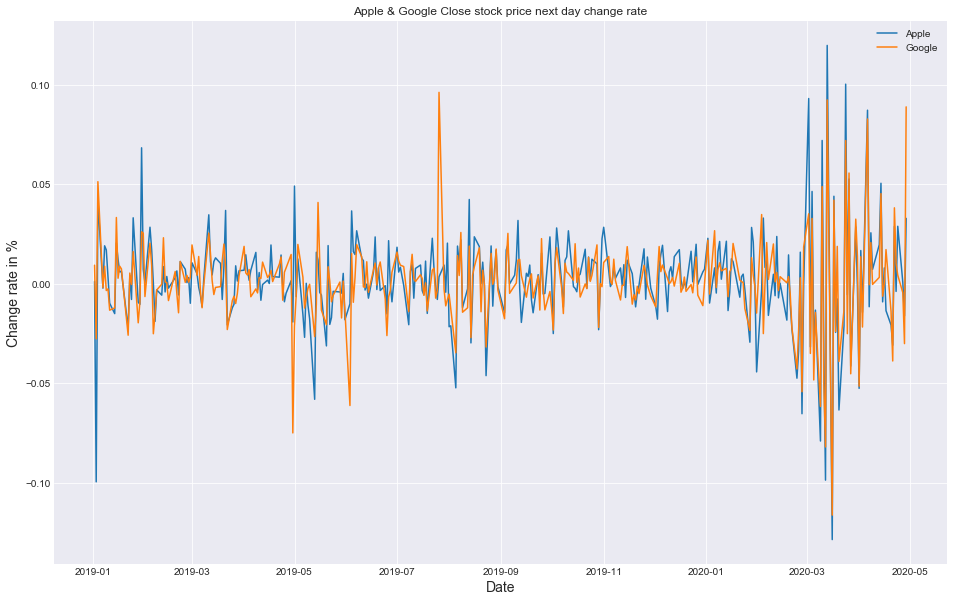

In [11]:
fig, ax = plt.subplots()

months = mdates.AutoDateLocator()
dateFmt = mdates.AutoDateFormatter(months)

ax.plot(date_x, aapl_y_diff, label='Apple')
ax.plot(date_x, googl_y_diff, label='Google')

ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(dateFmt)

plt.title('Apple & Google Close stock price next day change rate')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Change rate in %', fontsize=14)

plt.legend()

plt.show()

## Let's zoom in

In [12]:
zoom_day_end = 335
zoom_day_start = -99

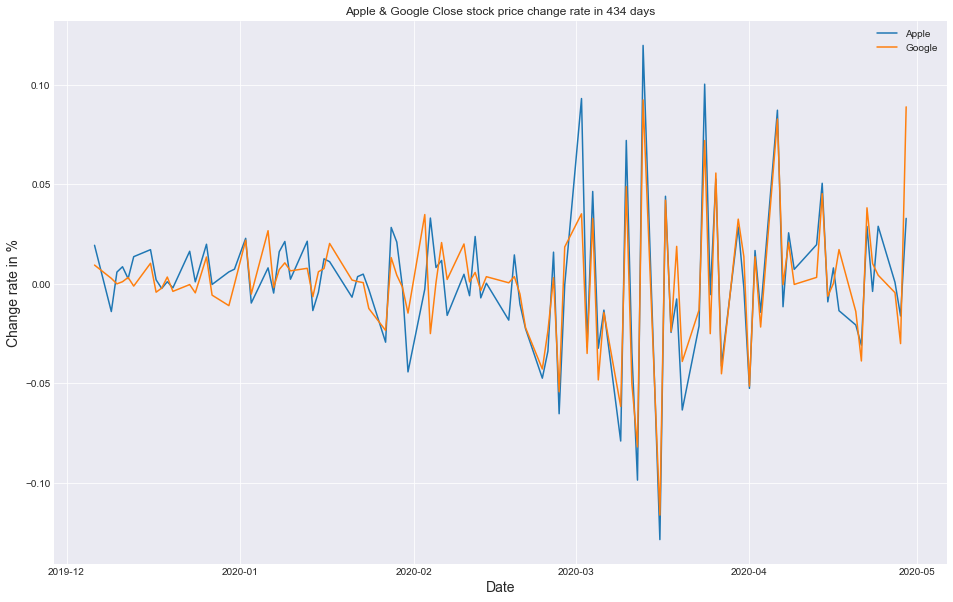

In [35]:
fig, ax = plt.subplots()

months = mdates.AutoDateLocator()
dateFmt = mdates.AutoDateFormatter(months)

ax.plot(date_x[zoom_day_start:zoom_day_end], aapl_y_diff[zoom_day_start:zoom_day_end], label='Apple')
ax.plot(date_x[zoom_day_start:zoom_day_end], googl_y_diff[zoom_day_start:zoom_day_end], label='Google')

ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(dateFmt)
title = 'Apple & Google Close stock price change rate in '+ str(zoom_day_end-zoom_day_start) +' days'
plt.title(title)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Change rate in %', fontsize=14)

plt.legend()

plt.show()

### The line graph above show that Apple and Google stock price have the same trend

## Apple vs Facebook

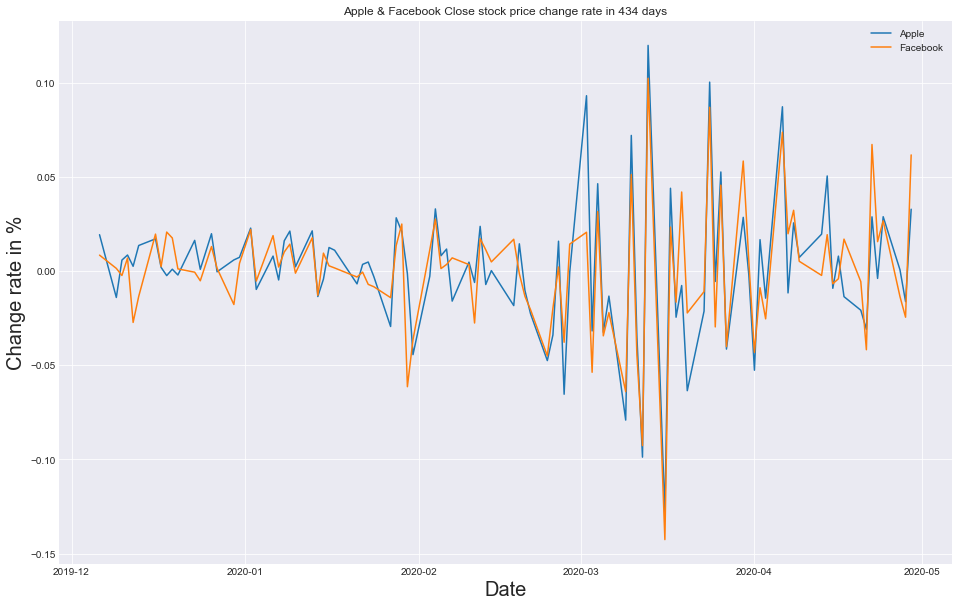

In [14]:
fig, ax = plt.subplots()

months = mdates.AutoDateLocator()
dateFmt = mdates.AutoDateFormatter(months)

ax.plot(date_x[zoom_day_start:zoom_day_end], aapl_y_diff[zoom_day_start:zoom_day_end], label='Apple')
ax.plot(date_x[zoom_day_start:zoom_day_end], fb_y_diff[zoom_day_start:zoom_day_end], label='Facebook')

ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(dateFmt)

title = 'Apple & Facebook Close stock price change rate in '+ str(zoom_day_end-zoom_day_start) +' days'
plt.title(title)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Change rate in %', fontsize=20)

plt.legend()

plt.show()

## Apple vs Microsoft

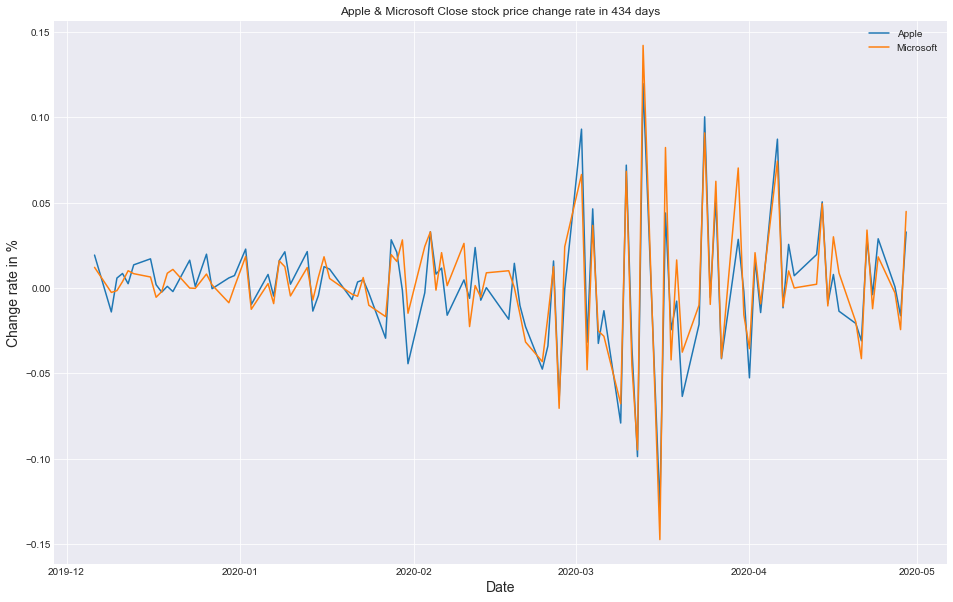

In [15]:
fig, ax = plt.subplots()

months = mdates.AutoDateLocator()
dateFmt = mdates.AutoDateFormatter(months)

ax.plot(date_x[zoom_day_start:zoom_day_end], aapl_y_diff[zoom_day_start:zoom_day_end], label='Apple')
ax.plot(date_x[zoom_day_start:zoom_day_end], msft_y_diff[zoom_day_start:zoom_day_end], label='Microsoft')

ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(dateFmt)

title = 'Apple & Microsoft Close stock price change rate in '+ str(zoom_day_end-zoom_day_start) +' days'
plt.title(title)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Change rate in %', fontsize=14)

plt.legend()

plt.show()

## Apple vs Amazon

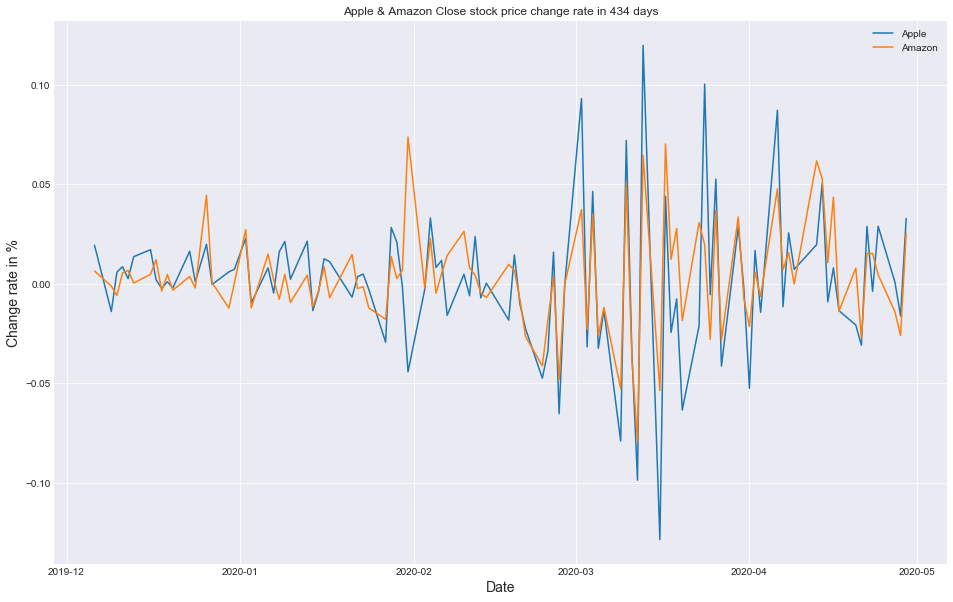

In [16]:
fig, ax = plt.subplots()

months = mdates.AutoDateLocator()
dateFmt = mdates.AutoDateFormatter(months)

ax.plot(date_x[zoom_day_start:zoom_day_end], aapl_y_diff[zoom_day_start:zoom_day_end], label='Apple')
ax.plot(date_x[zoom_day_start:zoom_day_end], amzn_y_diff[zoom_day_start:zoom_day_end], label='Amazon')

ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(dateFmt)

title = 'Apple & Amazon Close stock price change rate in '+ str(zoom_day_end-zoom_day_start) +' days'
plt.title(title)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Change rate in %', fontsize=14)

plt.legend()

plt.show()

# Kết luận: sau khi so sánh sự thay đổi giá cố phiếu của Apple với 4 công ty còn lại(Google, Microsoft, Facebook, Amazon), có thể thấy được rằng giá cổ phiếu của 5 công ty này có xu hướng thay đổi giống nhau (cùng tăng và cùng giảm).

## Tuy nghiên, do Facebook, Apple và Microsoft có giá cổ phiếu gần nhau nên dẫn đến việc change rate của các công ty này sẽ giống nhau hơn so với Google và Amazon (vì giá cổ phiếu Google và Amazon có giá cao hơn rất nhiều sơ với 3 công ty kia).

## Google vs Amazon

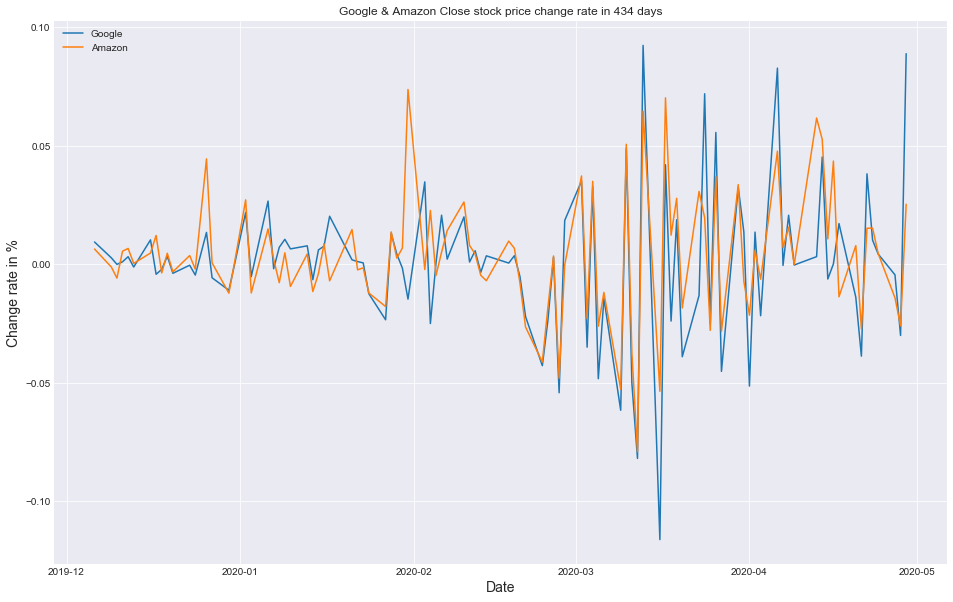

In [17]:
fig, ax = plt.subplots()

months = mdates.AutoDateLocator()
dateFmt = mdates.AutoDateFormatter(months)

ax.plot(date_x[zoom_day_start:zoom_day_end], googl_y_diff[zoom_day_start:zoom_day_end], label='Google')
ax.plot(date_x[zoom_day_start:zoom_day_end], amzn_y_diff[zoom_day_start:zoom_day_end], label='Amazon')

ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(dateFmt)

title = 'Google & Amazon Close stock price change rate in '+ str(zoom_day_end-zoom_day_start) +' days'
plt.title(title)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Change rate in %', fontsize=14)

plt.legend()

plt.show()

## Change rate của Google và Amazon cũng giống nhau hơn so với khi so sánh với Apple

## Sự giống nhau giữa stock của các công ty khi so sánh trên change rate cho thấy rằng các giá stock của các công ty có ảnh hưởng đến nhau => nên fit model với từng công ty một để tránh multicollinearity (các feature không độc lập với nhau, ảnh hưởng tới nhau quá nhiều). File 5vs1each so sánh kết quả dự đoán của mô hình khi fit với từng công ty một và với cả 5 công ty.

In [18]:
df = pd.read_csv('data/close_price_big_5.csv', index_col=['Date'], infer_datetime_format=True, parse_dates=['Date'])
df.head()

,AAPL,GOOGL,MSFT,AMZN,FB
Date,,,,,
2018-12-31,157.740005,1044.959961,101.570000,1501.969971,131.089996
2019-01-02,157.919998,1054.680054,101.120003,1539.130005,135.679993
2019-01-03,142.190002,1025.469971,97.400002,1500.280029,131.740005
2019-01-04,148.259995,1078.069946,101.930000,1575.390015,137.949997
2019-01-07,147.929993,1075.920044,102.059998,1629.510010,138.050003


# lấy giá chênh lệch

In [19]:
def get_diff(df, history=1):
    diff = []
    df = df.to_numpy()

    for i in range(history, len(df)):
        diff.append(df[i] - df[i-history])
        
    return np.array(diff)

In [20]:
def mean_relative_error(y_true, y_pred):
    return np.mean(np.abs((y_pred-y_true)/y_true))

In [21]:
cr = get_diff(df)
print(cr.shape)

(334, 5)


In [22]:
cr_aapl = get_diff(df['AAPL'])
print(type(cr_aapl))

<class 'numpy.ndarray'>


## Tạo bộ dữ liệu cho 1 công ty. X=Ngày hôm qua & giá chênh lệch giữa ngày hôm qua và hôm kia

In [23]:
def create_Xy(df, code):
    '''df has index as date
    columns are stock price of the companies
    '''
    history=2
    cr = get_diff(df[code])
    X1, X2, y, dates = [], [], [], []
    for row_idx in range(history, len(df)):
        X1.append( cr[row_idx-history:row_idx-1] )
        X2.append( df[code].iloc[row_idx-history+1:row_idx].values.reshape(-1) )
        
        y.append( df[code].iloc[row_idx].reshape(-1) )
        dates.append(df.index[row_idx])
    X1, X2, y = np.array(X1), np.array(X2), np.array(y)
    X = np.hstack((X1,X2))
    return X, y, dates

In [24]:
code = 'AAPL'
X,y,dates = create_Xy(df, code)

In [25]:
print(X.shape)
print(y.shape)

(333, 2)
(333, 1)


In [26]:
# use 7/10 of the dataset to train (use past price to predict future price)
n_train = len(y) * 7 // 10
X_train, y_train, dates_train, X_test, y_test, dates_test = X[:n_train], y[:n_train], dates[:n_train], X[n_train:], y[n_train:], dates[n_train:]

## Model

In [27]:
clf = LinearRegression()
clf.fit(X_train, y_train)
ypred = clf.predict(X_test)

## Plot result

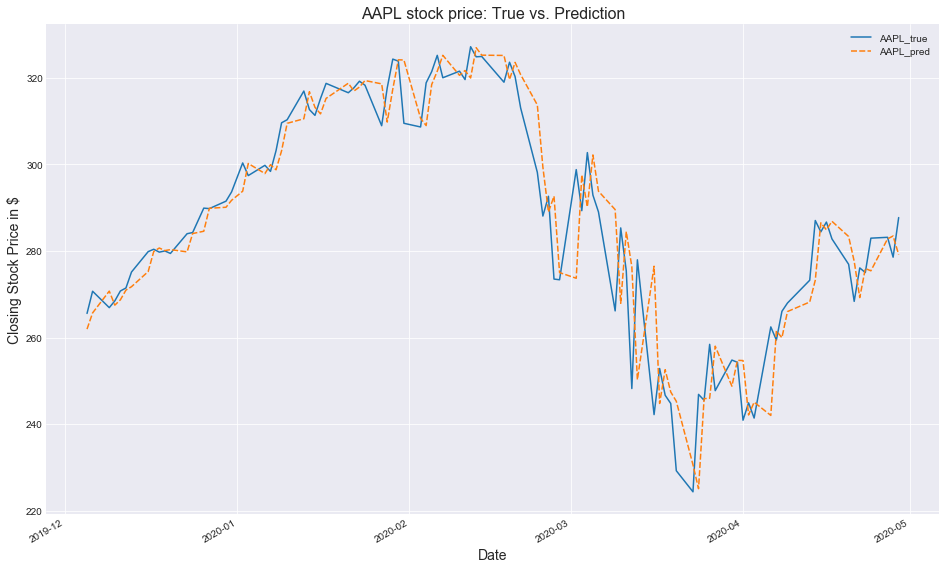

In [28]:
df_plot = pd.DataFrame({"AAPL_true": y_test.reshape(-1)[:], 'AAPL_pred': ypred.reshape(-1)[:]}, index=dates_test[:])

# Create subplots to plot graph and control axes
fig, ax = plt.subplots(figsize=(16,10))
sns.lineplot(data=df_plot)

# Format the ticks
loc = mdates.AutoDateLocator()
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(loc))

# Set figure title
plt.title(code + ' stock price: True vs. Prediction', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Closing Stock Price in $', fontsize=14)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show()

In [29]:
print(code, mean_relative_error(y_test.reshape(-1), ypred.reshape(-1)))

AAPL 0.023509369589300454


In [30]:
cor, a = pearsonr(X[:,1],X[:,0])
print(cor)
print(a)

0.049903911322355415
0.36398265163005983


## Predict Google

In [31]:
code = 'GOOGL'
X,y,dates = create_Xy(df, code)

# use 7/10 of the dataset to train (use past price to predict future price)
n_train = len(y) * 7 // 10
X_train, y_train, dates_train, X_test, y_test, dates_test = X[:n_train], y[:n_train], dates[:n_train], X[n_train:], y[n_train:], dates[n_train:]

clf = LinearRegression()
clf.fit(X_train, y_train)
ypred = clf.predict(X_test)

print(code, mean_relative_error(y_test.reshape(-1), ypred.reshape(-1)))

GOOGL 0.021479513360569986


## Predict Microsoft

In [32]:
code = 'MSFT'
X,y,dates = create_Xy(df, code)

# use 7/10 of the dataset to train (use past price to predict future price)
n_train = len(y) * 7 // 10
X_train, y_train, dates_train, X_test, y_test, dates_test = X[:n_train], y[:n_train], dates[:n_train], X[n_train:], y[n_train:], dates[n_train:]

clf = LinearRegression()
clf.fit(X_train, y_train)
ypred = clf.predict(X_test)

print(code, mean_relative_error(y_test.reshape(-1), ypred.reshape(-1)))

MSFT 0.02274797521829697


## Predict Amazon

In [33]:
code = 'AMZN'
X,y,dates = create_Xy(df, code)

# use 7/10 of the dataset to train (use past price to predict future price)
n_train = len(y) * 7 // 10
X_train, y_train, dates_train, X_test, y_test, dates_test = X[:n_train], y[:n_train], dates[:n_train], X[n_train:], y[n_train:], dates[n_train:]

clf = LinearRegression()
clf.fit(X_train, y_train)
ypred = clf.predict(X_test)

def mean_relative_error(y_true, y_pred):
    return np.mean(np.abs((y_pred-y_true)/y_true))

print(code, mean_relative_error(y_test.reshape(-1), ypred.reshape(-1)))

AMZN 0.018751342892847463


## Predict Facebook

In [34]:
code = 'FB'
X,y,dates = create_Xy(df, code)

# use 7/10 of the dataset to train (use past price to predict future price)
n_train = len(y) * 7 // 10
X_train, y_train, dates_train, X_test, y_test, dates_test = X[:n_train], y[:n_train], dates[:n_train], X[n_train:], y[n_train:], dates[n_train:]

clf = LinearRegression()
clf.fit(X_train, y_train)
ypred = clf.predict(X_test)

print(code, mean_relative_error(y_test.reshape(-1), ypred.reshape(-1)))

FB 0.023463631548145115
